In [1]:
# The Callable is any object that can be called (funct, method, class)
from typing import List, Tuple, Dict, Union, Callable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Construct a function which iterates the logistic equation

In [2]:
from src.utils import (logistic_eq_iterator, euler_method, newtons_law_of_cooling)

In [3]:
logistic_eq_iterator(2.7, 0.8, 5)

[0.8, 0.432, 0.6625152, 0.6036897864, 0.6459707561]

Construct a function which plots the orbit of the logistic equation

In [4]:
def plot_logistic_eq(r_value:float, seed: Union[float, int], iterations = int):

    # Call the function that calculates the orbit
    orbit = logistic_eq_iterator(r_value, seed, iterations)
    
    # Create the plot
    plt.plot(np.arange(1,iterations+1,1), orbit)
    plt.show()


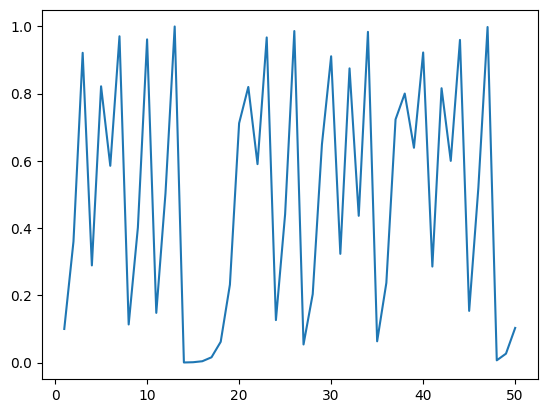

In [5]:
plot_logistic_eq(4, 0.1, 50)

### Constructing the Euler's method for solving Differential equations

In [3]:
data = euler_method(newtons_law_of_cooling, 0.5, 30, 0.2, 20, variable_magnitude=5)

In [4]:
data

,iteration,variable_magnitude
0,0,5.00000
1,1,6.50000
2,2,7.85000
3,3,9.06500
4,4,10.15850
5,5,11.14265
6,6,12.02839
7,7,12.82555
8,8,13.54299
9,9,14.18869


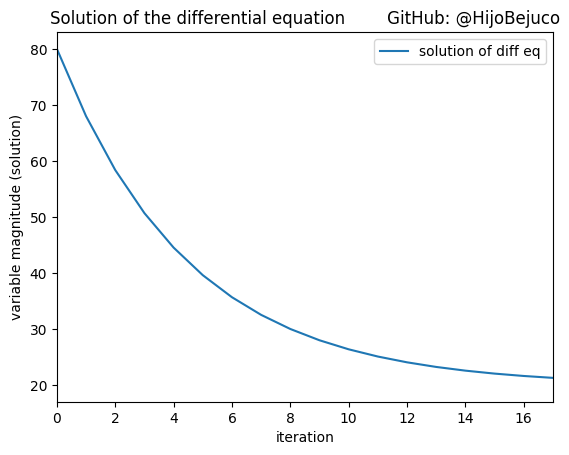

In [8]:
# Create a figure and an axes object
fig, ax = plt.subplots()

# Plotting the data
ax.plot(data.iteration, data.variable_magnitude, label="solution of diff eq")

# Add labels and title
ax.set_xlabel('iteration')
ax.set_ylabel('variable magnitude (solution)')
ax.set_title('Solution of the differential equation        GitHub: @HijoBejuco')

ax.set_xlim(0, 17)
# Add a legend
ax.legend()

# Show the plot
plt.show()

In [85]:
# test diff eq
def test(x):
    return (1/5)*x*(3-x)*(8-x)

In [96]:
data = euler_method(test, 0.0005, 1000, variable_magnitude = 2)

In [ ]:
#data = data[data.variable_magnitude <= 1e3]

In [97]:
data

,iteration,variable_magnitude
0,0,2.00000
1,1,2.00120
2,2,2.00240
3,3,2.00360
4,4,2.00480
...,...,...
995,995,2.73974
996,996,2.74012
997,997,2.74049
998,998,2.74086


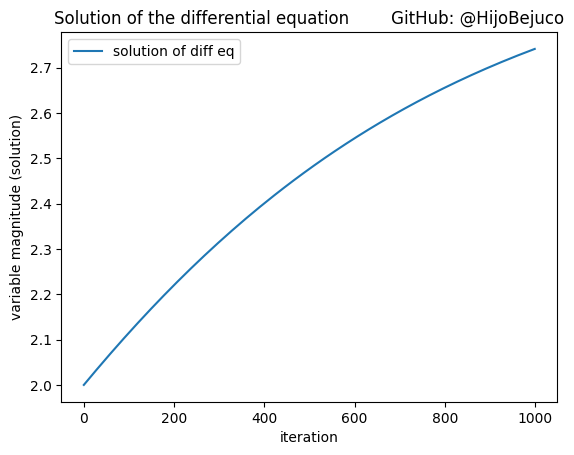

In [98]:
# Create a figure and an axes object
fig, ax = plt.subplots()

# Plotting the data
ax.plot(data.iteration, data.variable_magnitude, label="solution of diff eq")

# Add labels and title
ax.set_xlabel('iteration')
ax.set_ylabel('variable magnitude (solution)')
ax.set_title('Solution of the differential equation        GitHub: @HijoBejuco')

# Add a legend
ax.legend()

# Show the plot
plt.show()

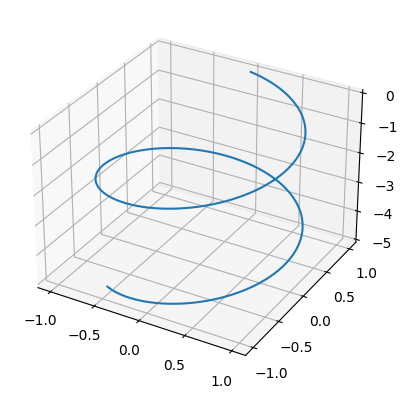

In [ ]:
# Ejemplo de trayectoria helicoidal (simplificado)
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 500)
x = np.sin(t)
y = np.cos(t)
z = -t * 0.5  # caída progresiva

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
plt.show()
